# Graphing for Trending video YouTube data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# us_csv_path = "../data/trends/USvideos.csv"
# us_json_path = "../data/trends/US_category_id.json"
df = pd.read_pickle("../../data/trends/USpipelined.pkl")
df.groupby("tags_count").describe().head(10)

views                                                           \
            count          mean           std     min        25%       50%   
tags_count                                                                   
0           261.0  1.347086e+06  3.380467e+06   745.0   37144.00  299365.0   
1            63.0  1.475394e+06  2.860605e+06  2472.0   35899.00  285469.0   
2            54.0  7.211164e+05  1.283186e+06   773.0   33291.75  181532.5   
3           102.0  5.281011e+05  1.082405e+06  2691.0   41822.75  163843.5   
4           185.0  4.035113e+06  1.733552e+07  1082.0  142590.00  651036.0   
5           160.0  2.056477e+06  6.792916e+06  1151.0   56346.50  299848.0   
6           150.0  3.966047e+06  1.223443e+07  1233.0   98869.25  391828.0   
7           203.0  2.708360e+06  9.406063e+06  2452.0   83347.00  370461.0   
8           185.0  1.504041e+06  5.127278e+06  2082.0   72294.00  284888.0   
9           175.0  1.865068e+06  9.392818e+06  1689.0  105366.50  494907.0   

                                    views_initial                 ...  \
                   75%          max         count           mean  ...   
tags_count                                                        ...   
0           1365087.00   24004779.0         261.0  531208.099617  ...   
1           1860455.00   18241671.0          63.0  611435.873016  ...   
2            824416.25    5755949.0          54.0  329117.462963  ...   
3            556043.75    6705850.0         102.0  202515.568627  ...   
4           2164847.00  225211923.0         185.0  939733.600000  ...   
5           1222678.00   56111957.0         160.0  619139.568750  ...   
6           1690130.00  122544931.0         150.0  970921.780000  ...   
7           1176048.50   71560694.0         203.0  625340.408867  ...   
8           1108618.00   60635812.0         185.0  628702.113514  ...   
9           1307298.00  123010920.0         175.0  798309.748571  ...   

           dislikes           comment_count                                   \
                75%       max         count          mean           std  min   
tags_count                                                                     
0           1098.00   59157.0         261.0   2668.160920   6015.822472  0.0   
1           1186.00   16969.0          63.0   3933.841270   8786.399112  0.0   
2            593.50    5089.0          54.0   1785.351852   3854.909769  0.0   
3            439.25   13855.0         102.0   1761.137255   3710.831275  0.0   
4           2572.00  343541.0         185.0  10120.854054  40595.265120  0.0   
5           1560.50   39174.0         160.0   6081.187500  19553.310623  0.0   
6           2806.50  165109.0         150.0  19808.293333  71403.128513  0.0   
7           1513.50  113990.0         203.0   6482.743842  20223.398348  0.0   
8           1096.00   63579.0         185.0   5877.254054  17949.558861  0.0   
9           1393.00  206892.0         175.0  11038.537143  92867.002012  0.0   

                                                
               25%     50%      75%        max  
tags_count                                      
0            33.00   515.0  2367.00    48389.0  
1            71.00   794.0  3121.00    51506.0  
2            21.00   264.5  1563.00    16563.0  
3            23.50   428.5  1728.75    26323.0  
4           307.00  1584.0  7405.00   517232.0  
5           142.75   639.0  3832.25   210605.0  
6           308.50  1147.5  5233.50   546100.0  
7           263.50  1067.0  3791.00   162990.0  
8           260.00   953.0  2662.00   156793.0  
9           359.50  1209.0  4050.50  1228655.0  

[10 rows x 48 columns]

In [3]:
def create_all_tags_list(df):
# transform tags column into all tags df
    tags_series = pd.Series(df['tags'].str.replace('"', '').str.split('|'))
    flatten_matrix = [val for sublist in tags_series for val in sublist]
    return flatten_matrix
list_of_tags = create_all_tags_list(df)
list_of_tags[5]

'season 15 episode 165'

In [4]:
# wordcloud wants one giant text string. so make that
tags_series = pd.Series(list_of_tags)
wc_string = tags_series.str.cat(sep=' ')
print(wc_string[160:500])
print(len(tags_series))
len(wc_string)

ndy kaling a wrinkle in time mindy kaling and b.j. novak katherine oprahs house ellen fans ellen tickets season 15 daughter mindy kaling daughter bj novak baby daddy ocean's 8 oceans 8 movie the office interview new funny hilarious sandra bullock anne hathaway wrinkle in time megan mullally megan mullally will and grace karen on will and 
126729


1514432

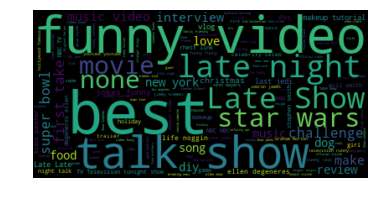

In [5]:
# Create and generate a word cloud image:
fullcloud = WordCloud().generate(wc_string)
plt.imshow(fullcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
# other colormaps default=viridis, cubehelix, CMRmap
fullcloud = WordCloud(max_font_size=40, max_words=80, background_color="white", 
                      colormap="CMRmap").generate(wc_string)
# fullcloud.to_file("../images/wc_all_standardstop.png")

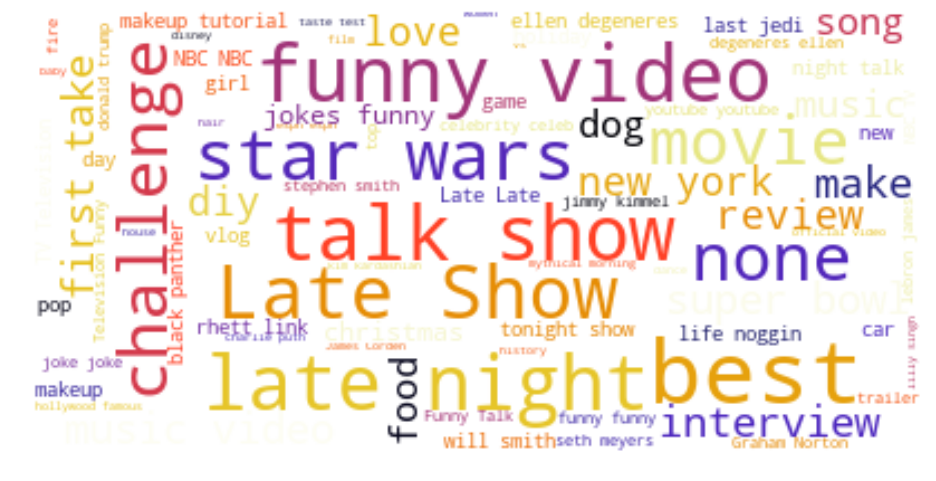

In [7]:
plt.figure(figsize=(16,10))
plt.imshow(fullcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
fullcloud.to_svg("../images/wc_all_standardstop.svg")

AttributeError: 'WordCloud' object has no attribute 'to_svg'

In [33]:
# pd.Series(list_of_tags).groupby().agg('count')
for_bar = pd.Index(list_of_tags).value_counts().sort_values(ascending=True).reset_index(name="tag_num").tail(100)
for_bar.head()

,index,tag_num
56406,Fallon monologue,72
56407,comedy sketches,72
56408,jimmy,72
56409,the ellen show,72
56410,Fallon Stand-up,72


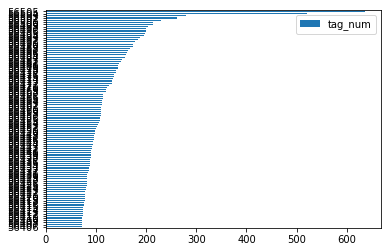

In [34]:
for_bar.plot.barh()

In [37]:
remove_none = pd.Index(list_of_tags).value_counts().reset_index(name="tag_num").head(21)
remove_none[remove_none['index'] != "[none]"]

,index,tag_num
0,funny,636
1,comedy,521
2,humor,279
4,comedian,229
5,celebrities,213
6,music,213
7,interview,204
8,how to,200
9,2018,199
10,celebrity,197
